### How To Learn Machine Learning Algorithms For Interviews

#### SVM

Theoretical Understanding:

1. https://www.youtube.com/watch?v=H9yACitf-KM
2. https://www.youtube.com/watch?v=Js3GLb1xPhc

##### 1. What Are the Basic Assumption?
There are no such assumptions

#####  2. Advantages
1. SVM is more effective in high dimensional spaces.
2. SVM is relatively memory efficient.
3. SVM’s are very good when we have no idea on the data.
4. Works well with even unstructured and semi structured data like text, Images and trees.
5. The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
6. SVM models have generalization in practice, the risk of over-fitting is less in SVM.

##### 3. Disadvantages
1. More Training Time is required for larger dataset
2. It is difficult to choose a good kernel function
https://www.youtube.com/watch?v=mTyT-oHoivA
3. The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

##### 4. Whether Feature Scaling is required?
Yes
##### 5. Impact of Missing Values?
Although SVMs are an attractive option when constructing a classifier, SVMs do not easily accommodate missing covariate information. Similar to other prediction and classification methods, in-attention to missing data when constructing an SVM can impact the accuracy and utility of the resulting classifier.
##### 6. Impact of outliers?
It is usually sensitive to outliers
https://arxiv.org/abs/1409.0934#:~:text=Despite%20its%20popularity%2C%20SVM%20has,causes%20the%20sensitivity%20to%20outliers.

Using Robust outlier Detection Algorithm

##### Types of Problems it can solve(Supervised)
1. Classification
2. Regression

##### Overfitting And Underfitting
In SVM, to avoid overfitting, we choose a Soft Margin, instead of a Hard one i.e. we let some data points enter our margin intentionally (but we still penalize it) so that our classifier don't overfit on our training sample

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  

##### Different Problem statement you can solve using Naive Baye's
1. We can use SVM with every ANN usecases
2. Intrusion Detection
3. Handwriting Recognition

#### Practical Implementation
1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

##### Performance Metrics

##### Classification
1. Confusion Matrix 
2. Precision,Recall, F1 score

##### Regression
1. R2,Adjusted R2
2. MSE,RMSE,MAE

#### How to choose C value?

 See the visualization here
 https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel#:~:text=The%20C%20parameter%20tells%20the,the%20training%20points%20classified%20correctly.
 
 Read the content here
 
 https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a
 
 There is no rule of thumb to choose a C value, it totally depends on your testing data. The only option I see is trying bunch of different values and choose the value which gives you lowest misclassification rate on testing data. I would suggest you to use gridsearchCV, in which you can directly give a list of different values parameter and it will tell you which value is best.


#### Math behind SVM

Put simple - https://heartbeat.fritz.ai/understanding-the-mathematics-behind-support-vector-machines-5e20243d64d5

https://medium.com/@ankitnitjsr13/math-behind-support-vector-machine-svm-5e7376d0ee4d

### How to choose C and Gamma value?

You can choose C and Gamma value with GridSearchCV along with cross validation.

#### How to Handle Larger DataSets with SVM??


https://www.sciencedirect.com/science/article/abs/pii/S0925231207002962#:~:text=Support%20vector%20machine%20(SVM)%20is,the%20size%20of%20data%20set.

### Exmaple of Building a custom Kernel?

https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html

### Examples

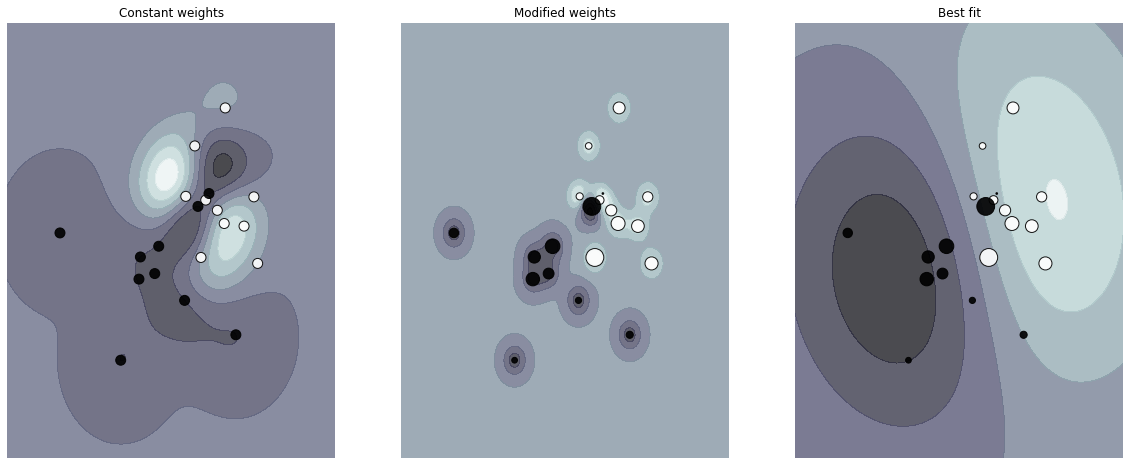

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(C = 10, gamma=10)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)
clf_weights_1 = svm.SVC(C = 0.1, gamma=0.1)
clf_weights_1.fit(X, y, sample_weight=sample_weight_last_ten)
clf_no_weights = svm.SVC(C = 100,gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")
plot_decision_function(clf_weights_1, sample_weight_last_ten, axes[2],
                       "Best fit")

plt.show()

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001] }
grid= GridSearchCV(SVC(),param_grid, verbose=3)

In [24]:
grid.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] .................... C=0.1, gamma=0.5, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.500, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.750, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.500, total=   0.0s
[CV] C=500, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=3)

In [25]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1}